In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from common.utils import*
from common.experiments import*
from common.networks import*

In [2]:
mat = scipy.io.loadmat('./binaryalphadigs.mat')
arrays_list = [ lire_alpha(mat['dat'],i) for i in range(10)]
test = np.concatenate(arrays_list, axis=0)
digits_test = torch.tensor(test).float()

In [3]:
# Create a DataLoader
train_dataset,test_dataset = load_mnist(None) # first we load 2000 random digits for the training
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)

In [4]:
device =  torch.device('cuda')
pretraining_args = Args(
     n_steps = 5000,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 128 ,
)
training_args = Args(
     lr = 1e-4,
     n_epochs = 30,
     train_loader = train_loader,
     test_loader = test_loader,
     device = device
    )
num_classes = 10
input_size = test.shape[1]
history = {"accuracy":[], "pretrained_accuracy":[]}

In [5]:
for i,n_layers in enumerate(range(2,11)):
    hidden_sizes = [300 for _ in range(n_layers)]
    print("\nConfig {}".format(i+1))
    model,pretrain_model = get_config(input_size=input_size,
                                        num_classes=num_classes,
                                        layer_config=hidden_sizes,
                                     device=device)
    accuracy,pretrain_accuracy = run_experiment(model=model,
                                            pretrain_model=pretrain_model,
                                            training=training_args,
                                            pretraining=pretraining_args)
    history['accuracy'].append(accuracy)
    history['pretrained_accuracy'].append(pretrain_accuracy)


Config 1
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:01<00:00,  4.05s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [00:22<00:00, 11.31s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:04<00:00,  4.14s/it]

[INFO] Evaluating models 



Config 2
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:07<00:00,  4.24s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [00:36<00:00, 12.02s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:02<00:00,  4.08s/it]

[INFO] Evaluating models 



Config 3
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:10<00:00,  4.36s/it]


[INFO] Pretraining  model 2 


100%|██████████| 4/4 [00:46<00:00, 11.72s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:09<00:00,  4.30s/it]

[INFO] Evaluating models 



Config 4
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:14<00:00,  4.48s/it]


[INFO] Pretraining  model 2 


100%|██████████| 5/5 [01:02<00:00, 12.46s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:12<00:00,  4.43s/it]

[INFO] Evaluating models 



Config 5
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:16<00:00,  4.54s/it]


[INFO] Pretraining  model 2 


100%|██████████| 6/6 [01:11<00:00, 11.88s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:15<00:00,  4.50s/it]

[INFO] Evaluating models 



Config 6
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:18<00:00,  4.60s/it]


[INFO] Pretraining  model 2 


100%|██████████| 7/7 [01:23<00:00, 11.86s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:22<00:00,  4.75s/it]

[INFO] Evaluating models 



Config 7
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:20<00:00,  4.70s/it]


[INFO] Pretraining  model 2 


100%|██████████| 8/8 [01:35<00:00, 11.93s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:20<00:00,  4.69s/it]

[INFO] Evaluating models 



Config 8
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:35<00:00,  5.17s/it]


[INFO] Pretraining  model 2 


100%|██████████| 9/9 [01:49<00:00, 12.14s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:27<00:00,  4.91s/it]

[INFO] Evaluating models 



Config 9
[INFO] training model 1 from scratch


100%|██████████| 30/30 [02:37<00:00,  5.25s/it]


[INFO] Pretraining  model 2 


100%|██████████| 10/10 [01:56<00:00, 11.63s/it]


[INFO] training model 2


100%|██████████| 30/30 [02:33<00:00,  5.11s/it]

[INFO] Evaluating models 


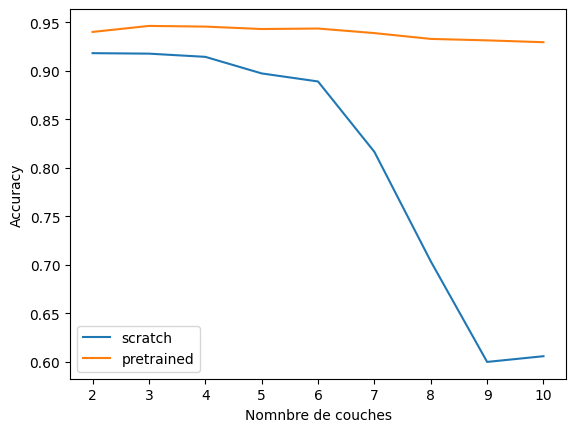

In [6]:
plt.plot(range(2,11),history['accuracy'],label="scratch")
plt.plot(range(2,11),history['pretrained_accuracy'],label="pretrained")
plt.xlabel('Nomnbre de couches')
plt.ylabel('Accuracy')
plt.legend()